In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import multivariate_normal
import pandas as pd
from scipy.stats import zscore
from sklearn.mixture import GaussianMixture

# Fitting GaussianMixture model
This notebook demonstrates using the `GaussianMixture` model to fit a two dimensional dataset composed of a mixture of two multivariate normal distributions. We use the `bic` measure for model selection as outlined in the [sklearn documentation](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py).

The number of components, mixture weights, means and covariance matricies are all inferred successfully from the data.

## Generating Samples

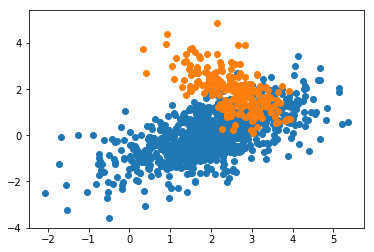

In [2]:
mean1, mean2 = np.array([2., 0]), np.array([2.5, 2.])
cov1, cov2 = np.array([[1.5, .8], [.8, 1]]), np.array([[.5, -.4], [-.4, .8]])
mixture = [.8, .2]
nsamples = 1000
samples1 = multivariate_normal(mean1, cov1, size=int(nsamples*mixture[0]))
samples2 = multivariate_normal(mean2, cov2, size=int(nsamples*mixture[1]))
samples = np.concatenate([samples1, samples2])
plt.scatter(samples1[:, 0], samples1[:, 1])
plt.scatter(samples2[:, 0], samples2[:, 1])
plt.show()

In [3]:
len(samples), len(samples1), len(samples2)

(1000, 800, 200)

## Model Selection

In [4]:
lowest_bic = np.infty
n_components_range = range(1, 5)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(samples)
        bic = gmm.bic(samples)
        if bic < lowest_bic:
            lowest_bic = bic
            best_gmm = gmm

In [5]:
best_gmm

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [6]:
best_gmm.n_components, best_gmm.covariance_type

(2, 'full')

In [7]:
best_gmm.weights_

array([0.74709458, 0.25290542])

In [8]:
best_gmm.means_

array([[ 1.92060629, -0.00851285],
       [ 2.62876525,  1.72624711]])

In [9]:
best_gmm.covariances_

array([[[ 1.3937075 ,  0.75414447],
        [ 0.75414447,  1.01215939]],

       [[ 0.62546672, -0.4123196 ],
        [-0.4123196 ,  0.92008014]]])